In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


knnp = {'n_neighbors': [2,4,5,9,15]}
bernoullip = {'alpha': [0.01, 0.1, 0.5,1,10]}
logisticp = {'C': [0.01, 0.1, 1, 10, 100]}
decisionp = {'max_depth': [3, 5, 10,15,20,50]}
randomp = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 10,15,20,50]}
svmp = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

models = [
    (KNeighborsClassifier(),knnp),
    (BernoulliNB(),bernoullip),
    (LogisticRegression(),logisticp),
    (DecisionTreeClassifier(),decisionp),
    (RandomForestClassifier(), randomp),
    (SVC(), svmp)
]

mnames=['Kneighbors','Bernoulli','logistic','Decision','Random','SVC']
table = pd.DataFrame(mnames, columns=['Models'])

In [4]:
df = pd.read_csv('Creditcard_data.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
classify=df.Class.value_counts(sort= True)
classify

0    763
1      9
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

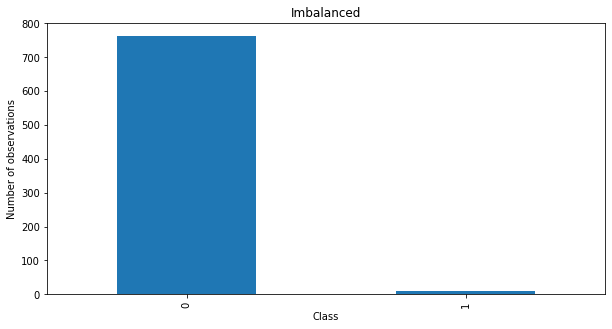

In [7]:
plt.figure(figsize=(10,5))
classify.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.title('Imbalanced')
plt.show

In [8]:
y=df['Class']
X=df.drop('Class',axis=1)
y.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [9]:
#in class over and under sampling were discussed. 
#In python we have SMOTE to oversample our data. 
#NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples.
#Here today I used SMOTE as undersampling will make trhe data size only 18. which is very less to train our data 
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)
X_new,y_new = smot.fit_resample(X,y)
y_new.value_counts()


0    763
1    763
Name: Class, dtype: int64

In [10]:
new_df=pd.concat([X_new,y_new],axis=1)
classify_new=new_df.Class.value_counts(sort= True)
classify_new

0    763
1    763
Name: Class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

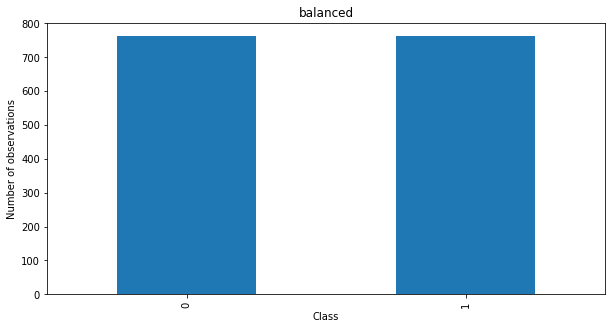

In [11]:
plt.figure(figsize=(10,5))
classify_new.plot(kind = 'bar')
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.title('balanced')
plt.show

Simple Random Sampling

In [12]:
np.random.seed(0)
z = 1.96 
p=0.5
e=0.05
srs_size = int((z**2 *p * (1-p))/0.05**2)
print(srs_size)
srs_sample = new_df.sample(n=srs_size, random_state=0)
print(srs_sample)
 


384
      Time        V1        V2        V3        V4        V5        V6  \
1361   389 -1.207761 -1.330960  1.696821  0.748215  1.835482  0.463235   
511    377  1.166919  0.027049  0.513875  0.860965 -0.519452 -0.681147   
9        9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
393    284 -0.810756  0.654499  2.217257  0.104341 -0.286801  0.117833   
471    346  1.077079  0.284980  0.007731  1.657073  0.052020  0.446389   
...    ...       ...       ...       ...       ...       ...       ...   
829    240 -0.677673  0.992140 -0.197271  1.337549  0.399417 -0.276864   
530    394  1.293053  0.457969 -1.940450  0.173149  2.609570  3.014117   
1363     1  1.178929  0.269444  0.169779  0.444303  0.068837 -0.078502   
795    277 -0.476912  0.399679  0.675193 -0.119410  0.852615  0.086466   
1370   494 -1.078786  0.333963  1.638110  0.026614  0.957878 -0.787730   

            V7        V8        V9  ...       V21       V22       V23  \
1361 -1.190303  0.540326  0.545271

In [13]:
#For this set of code, Chat gpt was used. 
#A new concept of merging columns with a merge indicator was learnt to find population - sample = test sample
merged = pd.merge(new_df, srs_sample, how='left', indicator=True)

df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df_remaining

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.800000,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,264,0.382945,0.369423,0.877133,0.489226,0.162918,-1.002651,0.403228,-0.184363,-0.035655,...,-0.146214,-0.387687,-0.026119,0.357784,0.285914,-0.124410,-0.055746,-0.031683,2.014954,1
1525,555,0.492592,-0.261778,0.445946,0.974898,-0.052258,-1.067008,0.135417,-0.184951,-0.036315,...,-0.118124,-0.597211,0.349717,0.229828,0.231558,0.051743,-0.063206,0.031801,95.161340,1
1526,278,-1.208271,1.420871,-1.050221,2.879562,-0.338765,-1.003062,-1.762814,0.980029,-1.977849,...,0.283149,-0.225220,-0.286736,0.112252,0.083160,0.161475,0.176042,-0.093498,0.847480,1
1527,517,-1.721457,-1.742412,2.278205,0.890897,2.072778,0.205123,-1.332251,0.542429,0.672296,...,0.329778,0.957523,0.153190,-0.533750,-0.060457,0.518827,-0.119372,-0.159272,1.369876,1


In [14]:
y_train=srs_sample['Class']
X_train = srs_sample.drop('Class',axis=1)
X_test = df_remaining.drop('Class',axis=1)
y_test = df_remaining['Class']

In [15]:
y_train.value_counts()

0    200
1    184
Name: Class, dtype: int64

In [16]:
y_test.value_counts()

1    579
0    558
Name: Class, dtype: int64

In [17]:
srs_accuracy=[]
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    accuracy = best_model.score(X_test, y_test)
    srs_accuracy.append(accuracy)

{'n_neighbors': 2}
{'alpha': 0.5}


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
{'max_depth': 15}
{'max_depth': 10, 'n_estimators': 200}
{'C': 100, 'gamma': 0.001}


In [18]:
table['SRS'] = srs_accuracy
table

,Models,SRS
0,Kneighbors,0.803870
1,Bernoulli,0.848725
2,logistic,0.913808
3,Decision,0.940193
4,Random,0.992084
5,SVC,0.871592


Systematic Sampling

In [19]:
np.random.seed(1)
import pandas as pd
import math

n = len(df)
m = int(math.sqrt(n))
print(m)
#evry m row 
ss_sample = new_df.iloc[::m]
print(ss_sample)
 


27
      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
27      23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
54      37  1.295668  0.341483  0.081505  0.566746 -0.110459 -0.766325   
81      52  1.147369  0.059035  0.263632  1.211023 -0.044096  0.301067   
108     73  1.162281  1.248178 -1.581317  1.475024  1.138357 -1.020373   
135     84  1.119272 -0.669639  0.803807 -0.651693 -1.395666 -0.800698   
162    103 -0.940893  1.074155  1.759398 -0.601446  0.101693 -0.188520   
189    124 -1.710935 -1.366799  2.217311  0.404714 -0.114375 -0.075942   
216    142  1.288256  0.085828 -1.179482  0.064357  2.195225  3.383363   
243    164 -0.433211  1.020835  2.019730  3.003261  0.031308  0.187063   
270    190 -0.549414  0.676861  2.151950  1.014523 -0.620012  0.076154   
297    211 -0.247827 -0.282682  1.653354 -1.014865 -0.680433  0.886364   
324    237  1.260248 -0.020172 -1.1

In [20]:
merged = pd.merge(new_df, ss_sample, how='left', indicator=True)
df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df_remaining
y_train=ss_sample['Class']
X_train = ss_sample.drop('Class',axis=1)
X_test = df_remaining.drop('Class',axis=1)
y_test = df_remaining['Class']

In [21]:
y_train.value_counts()

0    29
1    28
Name: Class, dtype: int64

In [22]:
ss_accuracy=[]
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    accuracy = best_model.score(X_test, y_test)
    ss_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'n_neighbors': 15}
KNeighborsClassifier accuracy: 63.78%
{'alpha': 10}
BernoulliNB accuracy: 77.33%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 84.34%
{'max_depth': 3}
DecisionTreeClassifier accuracy: 86.25%
{'max_depth': 15, 'n_estimators': 500}
RandomForestClassifier accuracy: 91.56%
{'C': 1, 'gamma': 0.01}
SVC accuracy: 67.73%


In [23]:
table['SS'] = ss_accuracy
table

,Models,SRS,SS
0,Kneighbors,0.803870,0.637849
1,Bernoulli,0.848725,0.773315
2,logistic,0.913808,0.843431
3,Decision,0.940193,0.862491
4,Random,0.992084,0.915589
5,SVC,0.871592,0.677332


Stratified Sampling

In [24]:
np.random.seed(1)
import pandas as pd
import math

strata = 'Class'
# Determine the number of strata based on the unique values of the stratification variable
S = new_df[strata].nunique()

z = 1.96 
e=0.05


In [25]:
#proportionate stratification:
'''
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size  
    as we used smote to balance our dataset therefor n1,n2 will be same. 
    theerfore we set a minimum sample size say 180
       
'''

sample_size = {}
for i in range(S):
    Ni = len(new_df[new_df[strata] == i])
    pi = new_df[new_df[strata] == i][strata].sum() / Ni
    ni = np.ceil((z**2 * pi * (1 - pi)) / ((e / S)**2 ))
    sample_size[i] = max(int(ni), 180)


sample_size

{0: 180, 1: 180}

In [26]:
stra_sample = pd.concat([new_df.loc[new_df[strata] == i].sample(n=sample_size[i], random_state=42) for i in range(S)])
stra_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
360,265,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,-0.538190,...,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,9.030000,0
262,184,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,...,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.980000,0
757,566,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,0.437687,...,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,18.560000,0
195,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.800000,0
336,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.980000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,486,-2.752793,-2.442101,1.110430,1.632425,1.261954,-0.892589,0.312988,-0.021356,-0.205356,...,0.474265,0.295666,1.011050,-0.281253,0.142811,-0.059430,-0.273350,-0.057663,411.360357,1
1374,547,0.147750,-0.544149,0.508604,1.103014,0.085446,-1.066795,0.153961,-0.173526,-0.059196,...,-0.042076,-0.496504,0.449796,0.178763,0.236262,0.032521,-0.081693,0.032188,137.469116,1
1248,511,-0.265778,0.388057,1.306559,0.336589,0.565154,-0.951447,0.641235,-0.172864,-0.094675,...,-0.040671,-0.052545,-0.141119,0.372580,0.339607,-0.287733,-0.079523,-0.078282,1.087871,1
1126,434,-2.188357,1.541878,-1.005903,2.992827,-0.210636,-1.181512,-1.931374,1.121518,-2.166866,...,0.366774,-0.068948,-0.421305,0.199777,-0.037441,0.191332,0.130230,-0.195162,0.215934,1


In [27]:
merged = pd.merge(new_df, stra_sample, how='left', indicator=True)
df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df_remaining
y_train=stra_sample['Class']
X_train = stra_sample.drop('Class',axis=1)
X_test = df_remaining.drop('Class',axis=1)
y_test = df_remaining['Class']

In [28]:
y_train.value_counts()

0    180
1    180
Name: Class, dtype: int64

In [29]:
stra_accuracy=[]
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    stra_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'n_neighbors': 2}
KNeighborsClassifier accuracy: 79.69%
{'alpha': 0.01}
BernoulliNB accuracy: 85.89%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 90.28%
{'max_depth': 10}


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier accuracy: 94.58%
{'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier accuracy: 98.97%
{'C': 100, 'gamma': 0.001}
SVC accuracy: 88.98%


In [30]:
table['Stra'] = stra_accuracy
table

,Models,SRS,SS,Stra
0,Kneighbors,0.803870,0.637849,0.796902
1,Bernoulli,0.848725,0.773315,0.858864
2,logistic,0.913808,0.843431,0.902754
3,Decision,0.940193,0.862491,0.945783
4,Random,0.992084,0.915589,0.989673
5,SVC,0.871592,0.677332,0.889845


CLUSTER 

In [31]:
from sklearn.cluster import KMeans
data= new_df
n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X_new[['Amount']])

cluster_labels = kmeans.labels_
data['clusters'] = cluster_labels
# number of samples in each cluster
print("Cluster sizes:")
cluster_sizes =pd.Series(cluster_labels).value_counts()
cluster_sizes



Cluster sizes:


0    1150
8     184
5      75
3      48
7      27
9      25
4       7
1       7
6       2
2       1
dtype: int64

In [32]:
fraud_proportions = data.groupby('clusters')['Class'].mean()
fraud_proportions

clusters
0    0.593913
1    0.000000
2    0.000000
3    0.500000
4    0.000000
5    0.213333
6    0.000000
7    0.629630
8    0.038043
9    0.640000
Name: Class, dtype: float64

In [33]:
#avg size of clusters
z=1.96
e=0.05
c=0
for i in range(n_clusters):
    c=c+cluster_sizes[i]

c = int(c/10) 
c= round(c/len(df),2)

c

0.2

In [34]:
sample_sizes = {}
for i in range(n_clusters):
    p_i = fraud_proportions[i]
    n_i = int(np.ceil((z**2 * p_i * (1 - p_i)) / ((e/c)**2)))
    sample_sizes[i] = n_i

sample_sizes

{0: 15, 1: 0, 2: 0, 3: 16, 4: 0, 5: 11, 6: 0, 7: 15, 8: 3, 9: 15}

In [35]:
np.random.seed(42)
selected_clusters = np.random.choice(range(n_clusters), size=int(n_clusters * 0.5), replace=False)

final_sample = pd.DataFrame()
for cluster in selected_clusters:
    sample = data[data['clusters'] == cluster].sample(sample_sizes[cluster], replace=False)
    final_sample = pd.concat([final_sample, sample])

final_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,clusters
190,125,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.710000,0,8
608,460,-2.264656,-0.707192,1.080243,-4.657545,-0.157183,-0.345406,0.595042,-0.386704,2.211141,...,0.222079,-0.189412,-0.332603,0.050197,-1.168870,-0.208793,-0.486754,50.780000,0,8
357,263,1.143649,0.128210,0.407255,1.160950,-0.504532,-0.904843,0.111993,-0.151667,0.180408,...,-0.221754,-0.049750,0.345483,0.495658,-0.440443,0.008209,0.031689,49.990000,0,8
751,561,-0.711797,-0.983416,2.042490,-2.348505,-1.670333,-0.407697,-0.243285,0.098952,-2.324725,...,0.659188,0.153339,0.486741,-0.021313,-0.232520,0.060912,0.115507,149.900000,0,5
158,99,-0.883996,-0.150765,2.291791,-0.263452,-0.814535,0.955841,0.097631,0.474047,0.139512,...,0.051832,0.110298,-0.260629,-0.097549,1.155439,-0.021199,0.062565,142.710000,0,5
169,108,-0.817164,0.548008,1.987429,2.347620,0.036888,1.509523,0.692961,0.508962,-1.254297,...,-0.324229,0.231980,-0.335248,0.161932,0.014694,-0.028691,-0.015257,148.430000,0,5
364,266,0.982539,-0.229085,0.003051,1.444009,0.200645,0.636756,0.012166,0.128519,-0.361986,...,-1.347024,-0.033817,-1.359832,-0.005459,0.706075,-0.091822,0.024234,154.400000,0,5
1010,511,-2.320490,-2.698492,2.044250,1.492373,2.123919,0.085353,-1.363037,0.525734,0.581591,...,0.962297,0.628542,-0.684317,-0.066222,0.552321,-0.163931,-0.107619,163.305657,1,5
224,147,0.912979,-0.653000,0.298165,0.209546,-0.197231,0.971100,-0.449461,0.281896,0.262493,...,-0.077306,-0.237707,-1.301415,0.179599,0.469956,-0.024739,0.028338,170.430000,0,5
306,221,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,...,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.820000,0,5


In [36]:
merged = pd.merge(new_df, final_sample, how='left', indicator=True)
df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns='_merge')
df_remaining
y_train=final_sample['Class']
X_train = final_sample.drop('Class', axis=1)
X_test = df_remaining.drop('Class',axis=1)
y_test = df_remaining['Class']

In [37]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,clusters
190,125,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,-0.201782,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.710000,8
608,460,-2.264656,-0.707192,1.080243,-4.657545,-0.157183,-0.345406,0.595042,-0.386704,2.211141,...,-0.632027,0.222079,-0.189412,-0.332603,0.050197,-1.168870,-0.208793,-0.486754,50.780000,8
357,263,1.143649,0.128210,0.407255,1.160950,-0.504532,-0.904843,0.111993,-0.151667,0.180408,...,-0.036001,-0.221754,-0.049750,0.345483,0.495658,-0.440443,0.008209,0.031689,49.990000,8
751,561,-0.711797,-0.983416,2.042490,-2.348505,-1.670333,-0.407697,-0.243285,0.098952,-2.324725,...,0.230367,0.659188,0.153339,0.486741,-0.021313,-0.232520,0.060912,0.115507,149.900000,5
158,99,-0.883996,-0.150765,2.291791,-0.263452,-0.814535,0.955841,0.097631,0.474047,0.139512,...,0.070901,0.051832,0.110298,-0.260629,-0.097549,1.155439,-0.021199,0.062565,142.710000,5
169,108,-0.817164,0.548008,1.987429,2.347620,0.036888,1.509523,0.692961,0.508962,-1.254297,...,-0.047336,-0.324229,0.231980,-0.335248,0.161932,0.014694,-0.028691,-0.015257,148.430000,5
364,266,0.982539,-0.229085,0.003051,1.444009,0.200645,0.636756,0.012166,0.128519,-0.361986,...,-0.315217,-1.347024,-0.033817,-1.359832,-0.005459,0.706075,-0.091822,0.024234,154.400000,5
1010,511,-2.320490,-2.698492,2.044250,1.492373,2.123919,0.085353,-1.363037,0.525734,0.581591,...,0.495838,0.962297,0.628542,-0.684317,-0.066222,0.552321,-0.163931,-0.107619,163.305657,5
224,147,0.912979,-0.653000,0.298165,0.209546,-0.197231,0.971100,-0.449461,0.281896,0.262493,...,0.089258,-0.077306,-0.237707,-1.301415,0.179599,0.469956,-0.024739,0.028338,170.430000,5
306,221,-0.342871,-0.199546,1.976353,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,...,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.820000,5


In [38]:
y_train.value_counts()

0    25
1    19
Name: Class, dtype: int64

In [39]:
clus_accuracy=[]
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    clus_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'n_neighbors': 4}
KNeighborsClassifier accuracy: 53.31%
{'alpha': 1}
BernoulliNB accuracy: 75.84%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 10}
LogisticRegression accuracy: 81.92%
{'max_depth': 5}
DecisionTreeClassifier accuracy: 81.65%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'max_depth': 20, 'n_estimators': 100}
RandomForestClassifier accuracy: 89.27%
{'C': 1, 'gamma': 0.001}
SVC accuracy: 61.54%


In [40]:
table['clus'] = clus_accuracy
table

,Models,SRS,SS,Stra,clus
0,Kneighbors,0.803870,0.637849,0.796902,0.533063
1,Bernoulli,0.848725,0.773315,0.858864,0.758435
2,logistic,0.913808,0.843431,0.902754,0.819163
3,Decision,0.940193,0.862491,0.945783,0.816464
4,Random,0.992084,0.915589,0.989673,0.892713
5,SVC,0.871592,0.677332,0.889845,0.615385


Normal splitting

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.3,random_state=20)


In [42]:
normal_accuracy=[]
for model, params in models:
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(best_params)
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    normal_accuracy.append(accuracy)
    print(type(model).__name__ + ' accuracy: {:.2f}%'.format(accuracy * 100))



{'n_neighbors': 2}
KNeighborsClassifier accuracy: 84.06%
{'alpha': 0.5}
BernoulliNB accuracy: 84.93%


c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ekasp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'C': 100}
LogisticRegression accuracy: 92.14%
{'max_depth': 15}
DecisionTreeClassifier accuracy: 98.25%
{'max_depth': 20, 'n_estimators': 100}
RandomForestClassifier accuracy: 99.13%
{'C': 100, 'gamma': 0.001}
SVC accuracy: 92.58%


In [43]:
table['normal'] = normal_accuracy
table

,Models,SRS,SS,Stra,clus,normal
0,Kneighbors,0.803870,0.637849,0.796902,0.533063,0.840611
1,Bernoulli,0.848725,0.773315,0.858864,0.758435,0.849345
2,logistic,0.913808,0.843431,0.902754,0.819163,0.921397
3,Decision,0.940193,0.862491,0.945783,0.816464,0.982533
4,Random,0.992084,0.915589,0.989673,0.892713,0.991266
5,SVC,0.871592,0.677332,0.889845,0.615385,0.925764


In [44]:
top= table
table = table.set_index('Models')
table

,SRS,SS,Stra,clus,normal
Models,,,,,
Kneighbors,0.803870,0.637849,0.796902,0.533063,0.840611
Bernoulli,0.848725,0.773315,0.858864,0.758435,0.849345
logistic,0.913808,0.843431,0.902754,0.819163,0.921397
Decision,0.940193,0.862491,0.945783,0.816464,0.982533
Random,0.992084,0.915589,0.989673,0.892713,0.991266
SVC,0.871592,0.677332,0.889845,0.615385,0.925764


MAXIMUM ACCURACY SAMPLE FOR ALL MODELS


The random forest model gives best accuracy for all models 

In [45]:
max_values = table.max()
max_values

SRS       0.992084
SS        0.915589
Stra      0.989673
clus      0.892713
normal    0.991266
dtype: float64

In [46]:
max_index = table.idxmax()
max_index

SRS       Random
SS        Random
Stra      Random
clus      Random
normal    Random
dtype: object

In [47]:
best= pd.DataFrame([max_index,max_values])
best.index = ['Model','Accuracy']

In [48]:
best

,SRS,SS,Stra,clus,normal
Model,Random,Random,Random,Random,Random
Accuracy,0.992084,0.915589,0.989673,0.892713,0.991266
